⭐ Image Prep

In [1]:
import sys
import os
from pathlib import Path

current_dir = Path(os.getcwd())
module_dir = current_dir.parent / 'modules'
sys.path.insert(0, str(module_dir))

import img_preprocessing as img

In [2]:
healthy_count = 0
for file in os.listdir('../data/formatted/224_formatted/healthy_coral'): 
    healthy_count+=1
print(f"Number of healthy coral imgs: {healthy_count}")

sctld_count = 0
for file in os.listdir('../data/formatted/224_formatted/sctld_coral'): 
    sctld_count+=1
print(f"Number of SCTLD coral imgs: {sctld_count}")

print(f"Total images: {sctld_count + healthy_count}")

Number of healthy coral imgs: 449
Number of SCTLD coral imgs: 463
Total images: 912


In [3]:

print(f"Count of images of healthy corals that are not in JPEG format: {img.check_imgformat(input_dir='../data/formatted/224_formatted/healthy_coral', format='jpeg')}")
print(f"Count of images of healthy corals that are not (224,224): {img.check_imgsize(input_dir="../data/formatted/224_formatted/healthy_coral", size=(224,224))}")
print(f"Count of images of SCTLD  corals that are not in JPEG format: {img.check_imgformat(input_dir='../data/formatted/224_formatted/sctld_coral', format='jpeg')}")
print(f"Count of images of SCTLD corals that are not (224,224): {img.check_imgsize(input_dir="../data/formatted/224_formatted/sctld_coral", size=(224,224))}")

Count of images of healthy corals that are not in JPEG format: 0
Count of images of healthy corals that are not (224,224): 0
Count of images of SCTLD  corals that are not in JPEG format: 0
Count of images of SCTLD corals that are not (224,224): 0


In [4]:
import tensorflow as tf 
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [5]:
IMAGE_SIZE = 224
BATCH_SIZE = 32
CHANNELS = 3 # RGB
EPOCHS = 50
INPUT_SHAPE = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)


In [6]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory = "../data/formatted/224_formatted", 
    seed = 123, 
    image_size = (IMAGE_SIZE, IMAGE_SIZE), 
    batch_size = BATCH_SIZE
)

Found 912 files belonging to 2 classes.


In [7]:
class_names = dataset.class_names
print(class_names)

['healthy_coral', 'sctld_coral']


In [8]:
for image_batch, labels_batch in dataset.take(1): 
    print(image_batch.shape)
    print(labels_batch)

(32, 224, 224, 3)
tf.Tensor([0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 1 0 1 1], shape=(32,), dtype=int32)


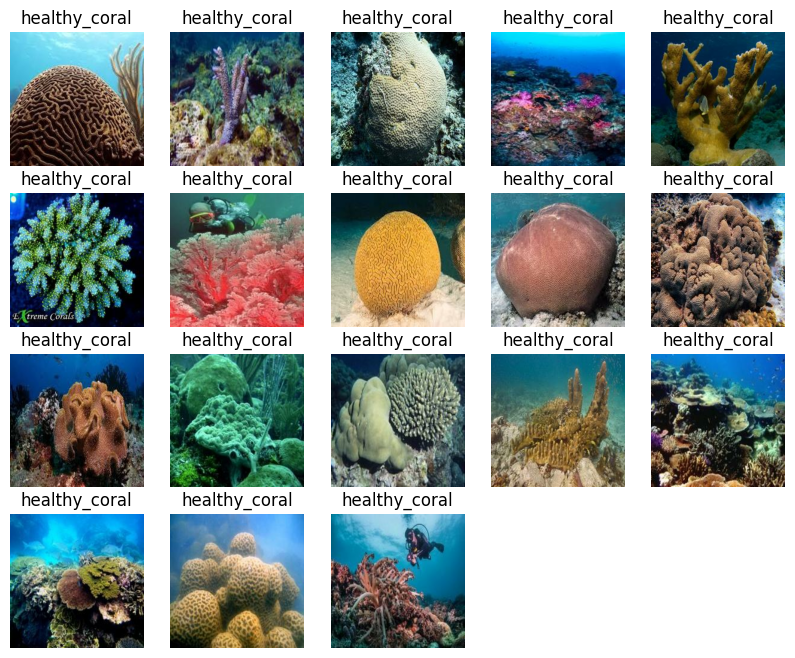

In [9]:
count = 0  
plt.figure(figsize=(10, 8))  # Adjust size for better visibility

for image_batch, label_batch in dataset.take(1): 
    for i in range(len(label_batch)):
        # Check the label condition
        if label_batch[i].numpy() == 0:
            count += 1
            ax = plt.subplot(4, 5, count)  # Use count for subplot index
            plt.imshow(image_batch[i].numpy().astype("uint8"))
            plt.title(class_names[label_batch[i]])
            plt.axis("off")
        
        # Stop after 20 valid images
        if count == 30:
            break

In [10]:
# def split_dataset(ds, train_split=0.8, val_split = 0.1, test_split = 0.1, shuffle = True, shuffle_size=1000): 
#     assert (train_split + test_split + val_split == 1)
#     ds_size = len(ds)
#     if shuffle: 
#         ds = ds.shuffle(shuffle_size, seed=12)

#     train_size = int(train_split * ds_size)
#     val_size = int(val_split * ds_size)

#     train_ds = ds.take(train_size)
#     val_ds = ds.skip(train_size).take(val_size)
#     test_ds = ds.skip(train_size).skip(val_size)

#     return train_ds, val_ds, test_ds

In [11]:
train_split= 0.8
ds = dataset
ds_size = len(ds)
ds = ds.shuffle(1000, seed=12)

train_size = int(train_split * ds_size)
print(train_size)

val_size = int((ds_size - train_size)/2)
print(val_size)
test_size = int((ds_size - train_size) / 2)
print(test_size)
print(test_size + train_size + val_size == ds_size)
train_ds = ds.take(train_size)
val_ds = ds.skip(train_size).take(val_size)
test_ds = ds.skip(train_size).skip(val_size)

print(train_ds)

23
3
3
True
<_TakeDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


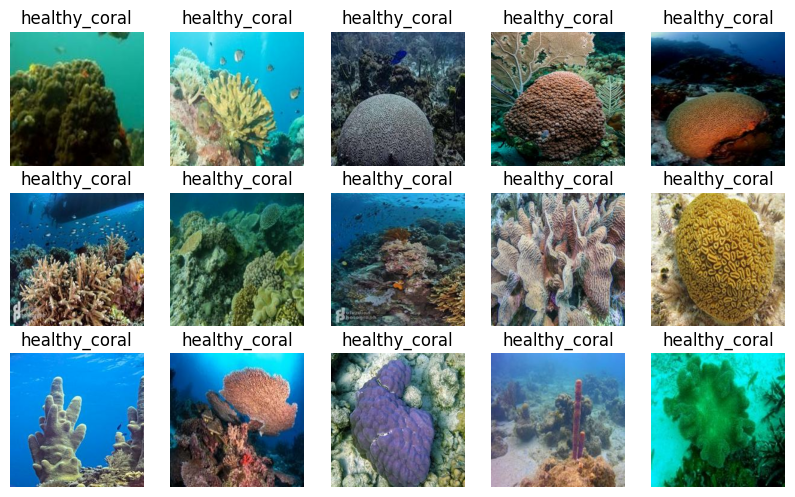

In [12]:
count = 0  
plt.figure(figsize=(10, 8))  

for image_batch, label_batch in train_ds.take(1): 
    for i in range(len(label_batch)):
        # Check the label condition
        if label_batch[i].numpy() == 0:
            count += 1
            ax = plt.subplot(4, 5, count)  # Use count for subplot index
            plt.imshow(image_batch[i].numpy().astype("uint8"))
            plt.title(class_names[label_batch[i]])
            plt.axis("off")
        
        # Stop after 20 valid images
        if count == 32:
            break

In [1]:
for image, label in train_ds.take(1):
    # Convert image to NumPy array
    image_array = image.numpy()

    # Print the range of pixel values in the image
    print("Train Min pixel value:", image_array.min())
    print("Train Max pixel value:", image_array.max())
    print("Train Image shape:", image_array.shape)

print("-----------------------------------")

for image, label in test_ds.take(1):
    # Convert image to NumPy array
    image_array = image.numpy()

    # Print the range of pixel values in the image
    print("Test Min pixel value:", image_array.min())
    print("Test Max pixel value:", image_array.max())
    print("Test Image shape:", image_array.shape)

print("-----------------------------------")

for image, label in val_ds.take(1):
    # Convert image to NumPy array
    image_array = image.numpy()

    # Print the range of pixel values in the image
    print("Validation Min pixel value:", image_array.min())
    print("Validation Max pixel value:", image_array.max())
    print("Validation Image shape:", image_array.shape)

NameError: name 'train_ds' is not defined

⭐ DATA AUGUMENTATION

In [14]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1./255), 
])

data_augumentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"), 
    layers.RandomRotation(0.1),
])

def train_data_augmentation(image, label):
    image = data_augumentation(image) 
    image = resize_and_rescale(image)  
    return image, label

def valtest_data_augmentation(image, label): 
    image = resize_and_rescale(image)
    return image, label


In [15]:
train_ds_augmented = train_ds.shuffle(1000).map(train_data_augmentation, num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)
test_ds_augmented = test_ds.shuffle(1000).map(valtest_data_augmentation, num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)
val_ds_augmented = val_ds.shuffle(1000).map(valtest_data_augmentation, num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)


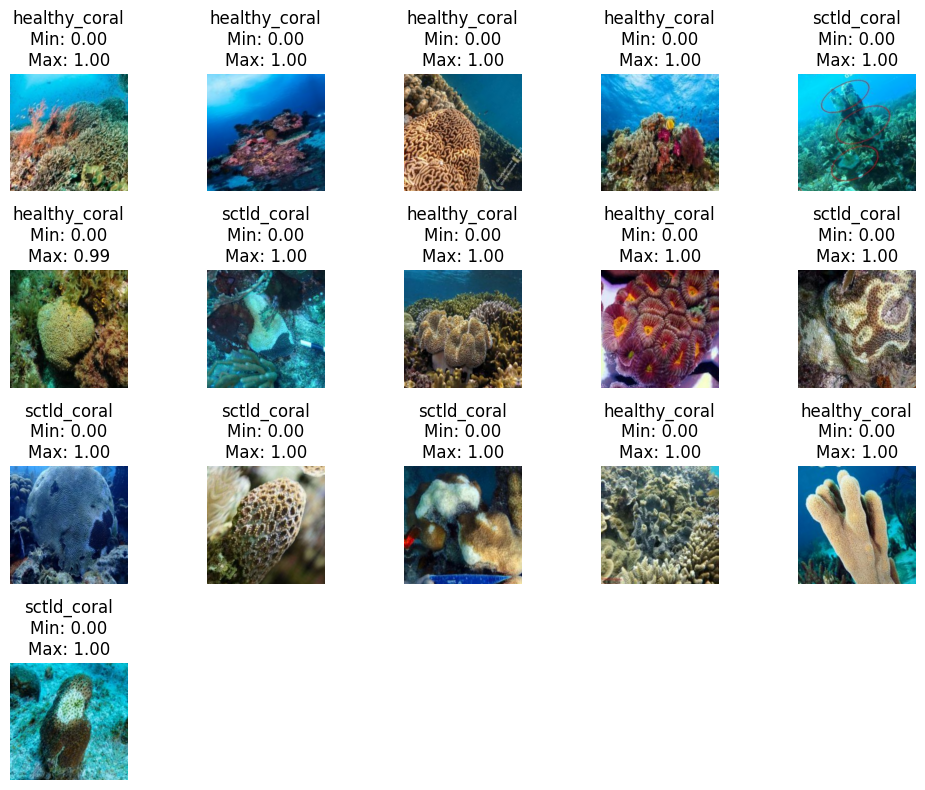

In [16]:
count = 0  
plt.figure(figsize=(10, 8)) 
for imageb, labelb in train_ds_augmented.take(1): 
    for i in range(len(labelb)): 
        count += 1
        if count > 20:  
            break
        ax = plt.subplot(4, 5, count) 
        image = imageb[i].numpy() * 255
        plt.imshow(image.astype("uint8"))
        plt.title( 
        f"{class_names[labelb[i].numpy()]}\n" 
        f"Min: {imageb[i].numpy().min():.2f}\n"  
        f"Max: {imageb[i].numpy().max():.2f}") 
        plt.axis("off")
    if count == 20:
        break

plt.tight_layout()  
plt.show()  


⭐ BUILD MODEL

In [17]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 2
inputs = layers.Input(shape=input_shape)

In [18]:
# load model

In [19]:
from tensorflow.keras.applications import EfficientNetB0 

In [28]:
model = EfficientNetB0(weights='imagenet', 
                        include_top=False, 
                        input_shape = input_shape
                       )

for layer in model.layers:
    layer.trainable = False 

for layer in model.layers[-10:]:  # Unfreeze the last 10 layers
    layer.trainable = True

model.summary()

Model: "efficientnetb0"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)    │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ rescaling_3 (Rescaling)       │ (None, 224, 224, 3)       │               0 │ input_layer_5[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ normalization_1               │ (None, 224, 224, 3)       │               7 │ rescaling_3[0][0]          │
│ (Normalization)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ rescaling_4 (Rescaling)       │ (None, 224, 224, 3)       │               0 │ normalization_1[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_conv_pad (ZeroPadding2D) │ (None, 225, 225, 3)       │               0 │ rescaling_4[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_conv (Conv2D)            │ (None, 112, 112, 32)      │             864 │ stem_conv_pad[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_bn (BatchNormalization)  │ (None, 112, 112, 32)      │             128 │ stem_conv[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_activation (Activation)  │ (None, 112, 112, 32)      │               0 │ stem_bn[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_dwconv                │ (None, 112, 112, 32)      │             288 │ stem_activation[0][0]      │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_bn                    │ (None, 112, 112, 32)      │             128 │ block1a_dwconv[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_activation            │ (None, 112, 112, 32)      │               0 │ block1a_bn[0][0]           │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_squeeze            │ (None, 32)                │               0 │ block1a_activation[0][0]   │
│ (GlobalAveragePooling2D)      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_reshape (Reshape)  │ (None, 1, 1, 32)          │               0 │ block1a_se_squeeze[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_reduce (Conv2D)    │ (None, 1, 1, 8)           │             264 │ block1a_se_reshape[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_expand (Conv2D)    │ (None, 1, 1, 32)          │             28

 Total params: 4,049,571 (15.45 MB)

 Trainable params: 893,232 (3.41 MB)

 Non-trainable params: 3,156,339 (12.04 MB)

In [29]:
from tensorflow.keras.layers import * 

In [30]:
cb_model = tf.keras.models.Sequential([model, 
                                       GlobalAveragePooling2D(), 
                                       Dense(256, activation='relu'), 
                                       Dropout(0.2), 
                                       Dense(128, activation='relu'), 
                                       Dropout(0.2), 
                                       Dense(1, activation='sigmoid')
                       
])
cb_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)          │ (None, 7, 7, 1280)          │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │         327,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,410,532 (16.82 MB)

 Trainable params: 1,254,193 (4.78 MB)

 Non-trainable params: 3,156,339 (12.04 MB)

⭐ TRAIN MODEL

In [31]:
from tensorflow.keras.metrics import *

metrics = ['accuracy', Precision(), Recall(), AUC()]

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

cb_model.compile(loss=BinaryCrossentropy(), 
                 optimizer=Adam(learning_rate=0.0001), 
                 metrics=metrics
                )


In [32]:
for batch in train_ds_augmented.take(1):  # Take one batch from the dataset
    x, y = batch  # Unpack the batch into inputs (x) and labels (y)
    print(f"x shape: {x.shape}")  # Shape of the input data
    print(f"y shape: {y.shape}")  # Shape of the labels
    print(f"x dtype: {x.dtype}")  # Data type of the input
    print(f"y dtype: {y.dtype}")  # Data type of the labels


x shape: (32, 224, 224, 3)
y shape: (32,)
x dtype: <dtype: 'float32'>
y dtype: <dtype: 'int32'>


In [33]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(patience=10, monitor='val_loss')

In [34]:
print(cb_model)

<Sequential name=sequential_3, built=True>


In [35]:
cb_model.fit(train_ds_augmented, 
             epochs=EPOCHS, 
             validation_data=val_ds_augmented, 
             callbacks=[es]        )

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 25s 431ms/step - accuracy: 0.4654 - auc_1: 0.4529 - loss: 0.7119 - precision_1: 0.4431 - recall_1: 0.5128 - val_accuracy: 0.4688 - val_auc_1: 0.4889 - val_loss: 0.7014 - val_precision_1: 0.4688 - val_recall_1: 1.0000
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 283ms/step - accuracy: 0.4886 - auc_1: 0.4590 - loss: 0.7037 - precision_1: 0.4825 - recall_1: 0.4784 - val_accuracy: 0.5417 - val_auc_1: 0.5822 - val_loss: 0.6890 - val_precision_1: 0.5417 - val_recall_1: 1.0000
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 288ms/step - accuracy: 0.4778 - auc_1: 0.4724 - loss: 0.6979 - precision_1: 0.4911 - recall_1: 0.5598 - val_accuracy: 0.4583 - val_auc_1: 0.5612 - val_loss: 0.7019 - val_precision_1: 0.4583 - val_recall_1: 1.0000
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 293ms/step - accuracy: 0.5135 - auc_1: 0.5006 - loss: 0.7013 - precision_1: 0.5063 - recall_1: 0.6078 - val_accuracy: 0.4688 - val_auc_1: 0.4967 - val_loss: 0.7019 - val_precision_1: 0.4688 - val_